In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# EfficientNetB0 Model

In [4]:
efficientnetb0 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x = tf.keras.layers.Dense(10, activation='softmax')(efficientnetb0.output)
efficientnetb0_model = tf.keras.Model(efficientnetb0.input, x)

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb0_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
history1 = efficientnetb0_model.fit(x_train, y_train, epochs=20, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/20


2023-04-13 20:54:11.372535: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 79s 44ms/step - loss: 2.2992 - accuracy: 0.1703 - val_loss: 2.3008 - val_accuracy: 0.1375
Epoch 2/20
782/782 [==============================] - 32s 41ms/step - loss: 2.1062 - accuracy: 0.2279 - val_loss: 2.0598 - val_accuracy: 0.2739
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 1.9743 - accuracy: 0.2702 - val_loss: 1.9353 - val_accuracy: 0.3067
Epoch 4/20
782/782 [==============================] - 33s 42ms/step - loss: 1.8668 - accuracy: 0.3059 - val_loss: 1.8362 - val_accuracy: 0.3361
Epoch 5/20
782/782 [==============================] - 32s 40ms/step - loss: 1.7756 - accuracy: 0.3402 - val_loss: 1.7467 - val_accuracy: 0.3659
Epoch 6/20
782/782 [==============================] - 29s 37ms/step - loss: 1.6928 - accuracy: 0.3729 - val_loss: 1.6492 - val_accuracy: 0.4057
Epoch 7/20
782/782 [==============================] - 29s 37ms/step - loss: 1.6173 - accuracy: 0.4041 - val_loss: 1.6054 - val_accuracy: 0.4145
Epo

In [7]:
efficientnetb0_model.save("efficientnetb0_model_10.h5")

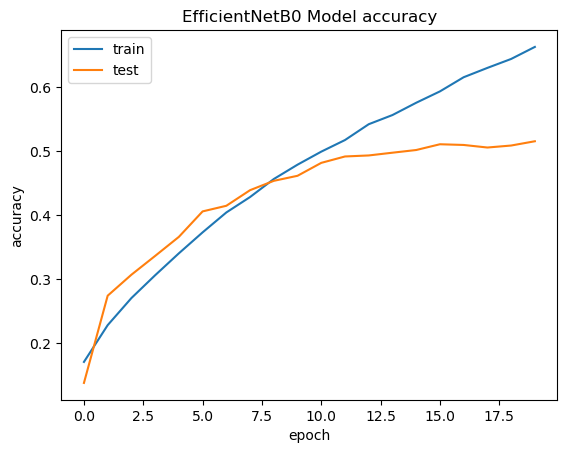

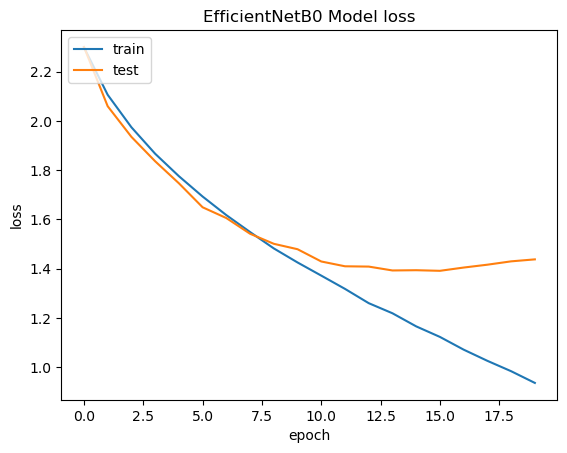

In [8]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB1 Model

In [9]:
efficientnetb1 = tf.keras.applications.efficientnet.EfficientNetB1(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x1 = tf.keras.layers.Dense(10, activation='softmax')(efficientnetb1.output)
efficientnetb1_model = tf.keras.Model(efficientnetb1.input, x1)

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb1_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
history2 = efficientnetb1_model.fit(x_train, y_train, epochs=20,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-13 21:05:17.811593: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 96s 59ms/step - loss: 2.3417 - accuracy: 0.1487 - val_loss: 2.3330 - val_accuracy: 0.1031
Epoch 2/20
782/782 [==============================] - 42s 53ms/step - loss: 2.2257 - accuracy: 0.1794 - val_loss: 2.3433 - val_accuracy: 0.1802
Epoch 3/20
782/782 [==============================] - 42s 54ms/step - loss: 2.1594 - accuracy: 0.2054 - val_loss: 2.2204 - val_accuracy: 0.2222
Epoch 4/20
782/782 [==============================] - 42s 54ms/step - loss: 2.0990 - accuracy: 0.2242 - val_loss: 2.1343 - val_accuracy: 0.2518
Epoch 5/20
782/782 [==============================] - 41s 53ms/step - loss: 2.0385 - accuracy: 0.2465 - val_loss: 2.0981 - val_accuracy: 0.2640
Epoch 6/20
782/782 [==============================] - 42s 53ms/step - loss: 1.9694 - accuracy: 0.2766 - val_loss: 1.9752 - val_accuracy: 0.3058
Epoch 7/20
782/782 [==============================] - 42s 53ms/step - loss: 1.9033 - accuracy: 0.2977 - val_loss: 1.8715 - val_accuracy: 0.3259
Epo

In [12]:
efficientnetb1_model.save("efficientnetb1_model_10.h5")

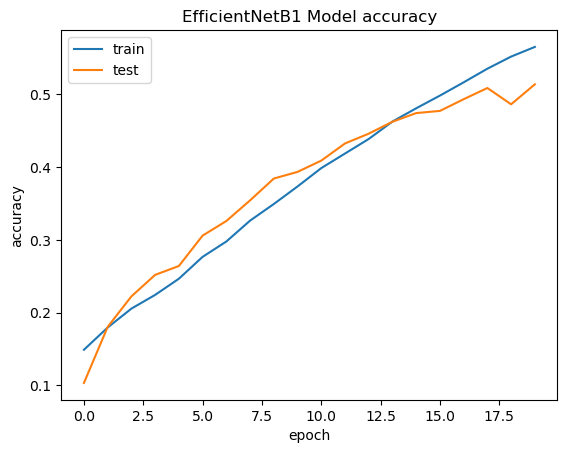

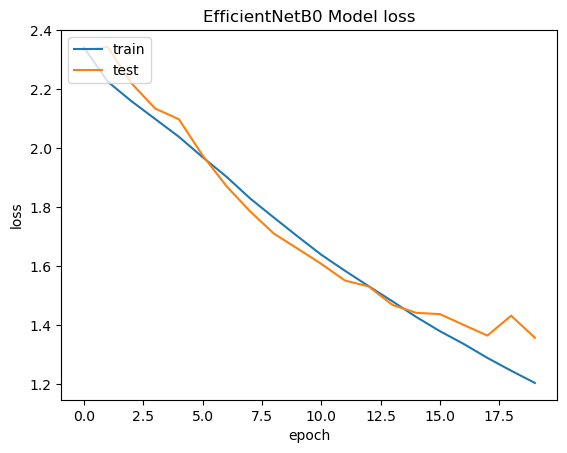

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('EfficientNetB1 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB2 Model

In [14]:
efficientnetb2 = tf.keras.applications.efficientnet.EfficientNetB2(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x3 = tf.keras.layers.Dense(10, activation='softmax')(efficientnetb2.output)
efficientnetb2_model = tf.keras.Model(efficientnetb2.input, x3)

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb2_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
history3 = efficientnetb2_model.fit(x_train, y_train, epochs=20,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-13 21:20:31.276740: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 98s 57ms/step - loss: 2.3212 - accuracy: 0.1551 - val_loss: 2.2913 - val_accuracy: 0.1375
Epoch 2/20
782/782 [==============================] - 42s 54ms/step - loss: 2.1875 - accuracy: 0.1898 - val_loss: 2.2547 - val_accuracy: 0.2172
Epoch 3/20
782/782 [==============================] - 42s 54ms/step - loss: 2.1132 - accuracy: 0.2111 - val_loss: 2.1411 - val_accuracy: 0.2358
Epoch 4/20
782/782 [==============================] - 43s 55ms/step - loss: 2.0452 - accuracy: 0.2403 - val_loss: 2.0184 - val_accuracy: 0.2578
Epoch 5/20
782/782 [==============================] - 42s 53ms/step - loss: 1.9788 - accuracy: 0.2668 - val_loss: 1.9733 - val_accuracy: 0.3024
Epoch 6/20
782/782 [==============================] - 42s 54ms/step - loss: 1.8986 - accuracy: 0.2980 - val_loss: 1.8723 - val_accuracy: 0.3321
Epoch 7/20
782/782 [==============================] - 42s 54ms/step - loss: 1.8246 - accuracy: 0.3263 - val_loss: 1.7977 - val_accuracy: 0.3608
Epo

In [17]:
efficientnetb2_model.save("efficientnetb2_model_10.h5")

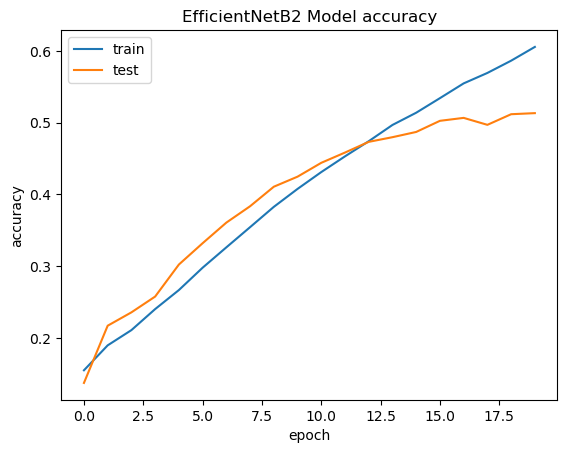

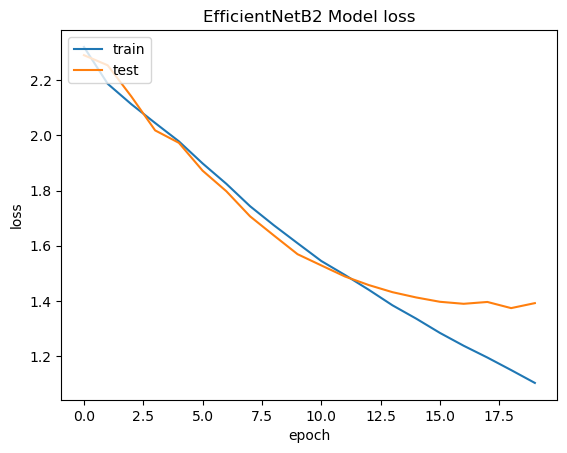

In [18]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('EfficientNetB2 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('EfficientNetB2 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# EfficientNetB3 Model

In [19]:
efficientnetb3 = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x4 = tf.keras.layers.Dense(10, activation='softmax')(efficientnetb3.output)
efficientnetb3_model = tf.keras.Model(efficientnetb3.input, x4)

In [20]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

efficientnetb3_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
history4 = efficientnetb3_model.fit(x_train, y_train, epochs=20,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20


2023-04-13 21:36:06.499116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 111s 67ms/step - loss: 2.3631 - accuracy: 0.1461 - val_loss: 2.3422 - val_accuracy: 0.1204
Epoch 2/20
782/782 [==============================] - 51s 65ms/step - loss: 2.2277 - accuracy: 0.1781 - val_loss: 2.2751 - val_accuracy: 0.2006
Epoch 3/20
782/782 [==============================] - 50s 64ms/step - loss: 2.1439 - accuracy: 0.2022 - val_loss: 2.1697 - val_accuracy: 0.2425
Epoch 4/20
782/782 [==============================] - 50s 63ms/step - loss: 2.0773 - accuracy: 0.2282 - val_loss: 2.1414 - val_accuracy: 0.2582
Epoch 5/20
782/782 [==============================] - 50s 64ms/step - loss: 2.0133 - accuracy: 0.2541 - val_loss: 1.9787 - val_accuracy: 0.2964
Epoch 6/20
782/782 [==============================] - 48s 62ms/step - loss: 1.9454 - accuracy: 0.2795 - val_loss: 1.9583 - val_accuracy: 0.3161
Epoch 7/20
782/782 [==============================] - 52s 67ms/step - loss: 1.8753 - accuracy: 0.3114 - val_loss: 1.8422 - val_accuracy: 0.3342
Ep

In [22]:
efficientnetb3_model.save("efficientnetb3_model_10.h5")

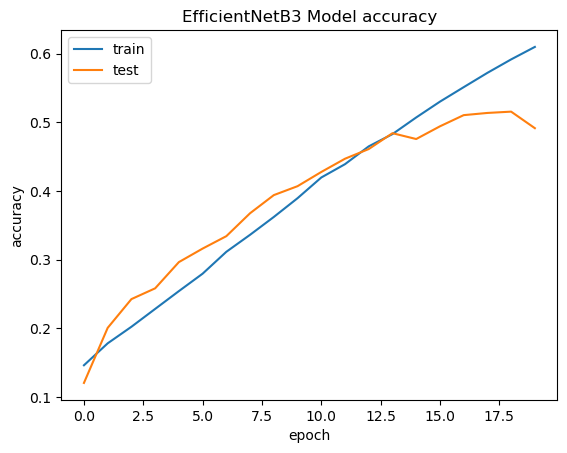

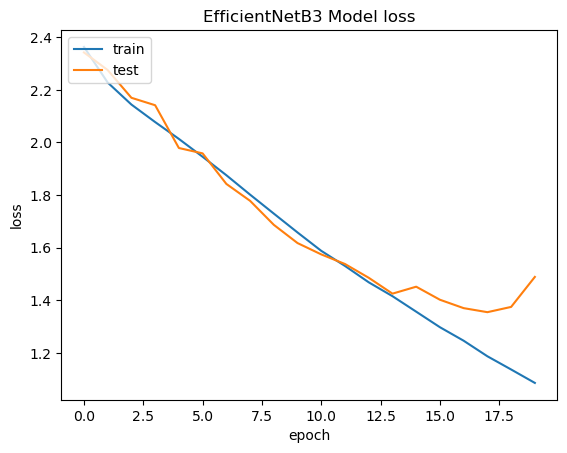

In [23]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('EfficientNetB3 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('EfficientNetB3 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()